In [2]:
!pip install dask[complete] pandas

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [20]:
import dask.dataframe as dd
df = dd.read_csv('superstore.csv', dtype={'Discount': 'float64'}) 
df

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,Order.Priority,Product.ID,Product.Name,Profit,Quantity,Region,Row.ID,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,,,,,
,string,string,string,string,string,float64,string,int64,string,string,string,string,string,float64,int64,string,int64,int64,string,string,string,float64,string,string,int64,string,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [21]:
print(df.dtypes)

Category          string[pyarrow]
City              string[pyarrow]
Country           string[pyarrow]
Customer.ID       string[pyarrow]
Customer.Name     string[pyarrow]
Discount                  float64
Market            string[pyarrow]
记录数                         int64
Order.Date        string[pyarrow]
Order.ID          string[pyarrow]
Order.Priority    string[pyarrow]
Product.ID        string[pyarrow]
Product.Name      string[pyarrow]
Profit                    float64
Quantity                    int64
Region            string[pyarrow]
Row.ID                      int64
Sales                       int64
Segment           string[pyarrow]
Ship.Date         string[pyarrow]
Ship.Mode         string[pyarrow]
Shipping.Cost             float64
State             string[pyarrow]
Sub.Category      string[pyarrow]
Year                        int64
Market2           string[pyarrow]
weeknum                     int64
dtype: object


In [22]:
df.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


In [23]:
high_value_sales = df[df['Sales'] > 1000]
print(df.columns)

Index(['Category', 'City', 'Country', 'Customer.ID', 'Customer.Name',
       'Discount', 'Market', '记录数', 'Order.Date', 'Order.ID', 'Order.Priority',
       'Product.ID', 'Product.Name', 'Profit', 'Quantity', 'Region', 'Row.ID',
       'Sales', 'Segment', 'Ship.Date', 'Ship.Mode', 'Shipping.Cost', 'State',
       'Sub.Category', 'Year', 'Market2', 'weeknum'],
      dtype='object')


In [24]:
sales_by_region = df.groupby('Country')['Sales'].sum().compute()
print(sales_by_region)

Country
Afghanistan    21674
Albania         3888
Algeria        36090
Angola         25551
Argentina      57510
               ...  
Venezuela      26587
Vietnam        65802
Yemen           2464
Zambia         26029
Zimbabwe        3767
Name: Sales, Length: 147, dtype: int64


In [25]:
top_products = df.groupby('Sub.Category')['Sales'].sum().nlargest(10).compute()
print(top_products)

Sub.Category
Phones         1706874
Copiers        1509439
Chairs         1501682
Bookcases      1466559
Storage        1127124
Appliances     1011081
Machines        779071
Tables          757034
Accessories     749307
Binders         461952
Name: Sales, dtype: int64


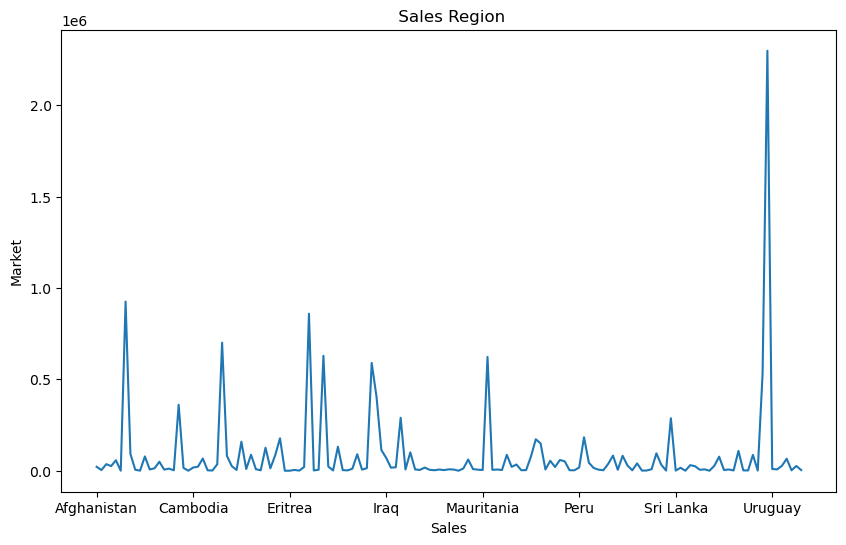

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sales_by_region.plot(kind='line', title=' Sales Region')
plt.xlabel('Sales')
plt.ylabel('Market')
plt.show()

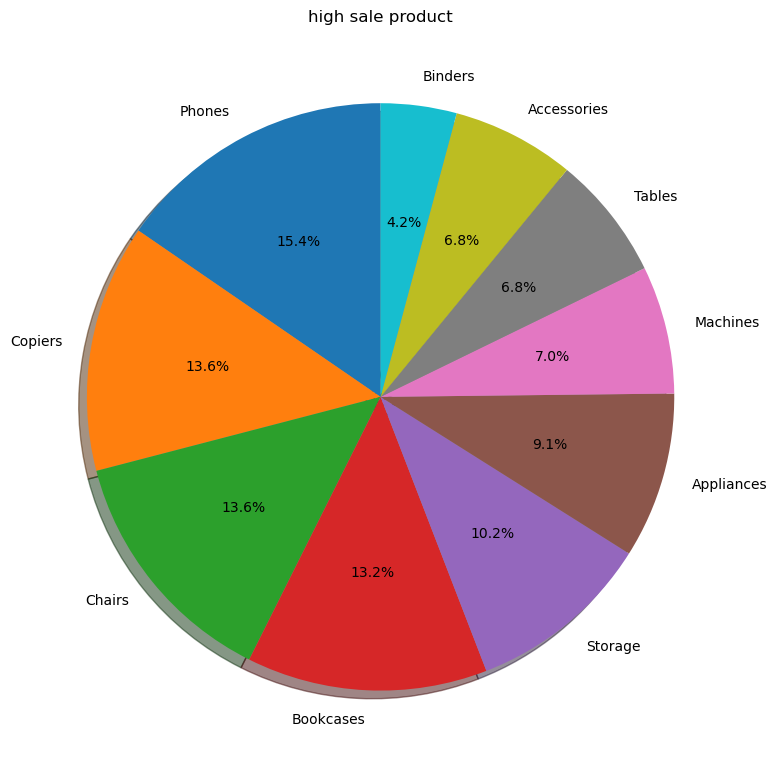

In [27]:
plt.figure(figsize=(8, 8))  
top_products.plot(
    kind='pie',
    autopct='%1.1f%%',       
    startangle=90,           
    legend=False,
    shadow=True              
)
plt.title('high sale product')
plt.ylabel('')   
plt.tight_layout()
plt.show()